# Model 1: CNN

First we will build a  vanilla CNN

In [ ]:
### Installing the package required to import functions from notebooks
#!pip install import-ipynb

In [ ]:
import import_ipynb
import os
from google.colab import files
files.upload()
os.chdir("/content/drive/MyDrive/Capstone Benchmark Models")

### We will import all the data_preparation functions
from  data_preparation import *


### We will import all visualization functions
from  plots import *

In [ ]:
### Importing necessary libraries

%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16
from keras import datasets, layers


## Preparing the Training and Test DataSet

In [ ]:
### Dataset is downloaded
download_kaggle()

 97% 197M/203M [00:05<00:00, 116MB/s] 
100% 203M/203M [00:05<00:00, 41.8MB/s]


In [ ]:
### Images are extracted
image_files=image_extract()


In [ ]:
### Preparing independent X
X=image_preprocessing_step(image_files,"cnn")

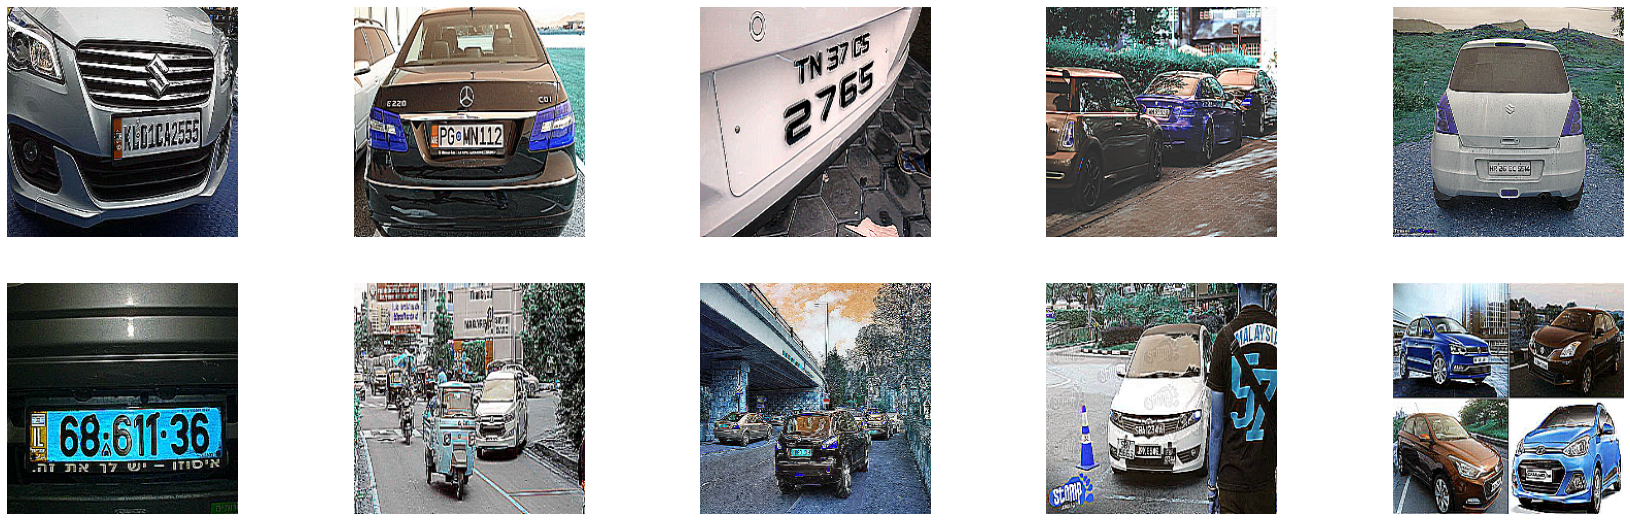

In [ ]:
### Showing first 10 images
images_show(10,X)

In [ ]:
### Getting a list annotations file

annotations_files=annotations_extract()

In [ ]:
### Extracting boundaries from annotations

y=boundary_extract(annotations_files)

In [ ]:
### Test train prepartion for 90/10 split
X_train, X_val, y_train, y_val,X_test,y_test=train_test(X,y)


### Model

In [ ]:
# Create the model
# We are building a standard CNN model for regression to predict the boundaries of the license plate
# The model has been tuned to optimise MSE

model = Sequential()
model.add(layers.Conv2D(IMAGE_SIZE, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation="sigmoid"))



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 224)     6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 224)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      129088    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0

In [ ]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import Adam

checkpoint = ModelCheckpoint('my_model.h5', monitor= 'mse', mode= 'min', save_best_only = True, verbose= 1)
lr_reduce = ReduceLROnPlateau(monitor='mse', factor=0.6, patience=8, verbose=1, mode='min', min_lr=5e-5)

### We are using mean squared error loss function
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['MeanAbsoluteError','mse'])

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
10/10 [==============================] - 14s 434ms/step - loss: 0.1067 - mean_absolute_error: 0.2658 - mse: 0.1067 - val_loss: 0.0246 - val_mean_absolute_error: 0.1171 - val_mse: 0.0246
Epoch 2/50
10/10 [==============================] - 2s 185ms/step - loss: 0.0227 - mean_absolute_error: 0.1155 - mse: 0.0227 - val_loss: 0.0240 - val_mean_absolute_error: 0.1152 - val_mse: 0.0240
Epoch 3/50
10/10 [==============================] - 2s 185ms/step - loss: 0.0220 - mean_absolute_error: 0.1134 - mse: 0.0220 - val_loss: 0.0228 - val_mean_absolute_error: 0.1102 - val_mse: 0.0228
Epoch 4/50
10/10 [==============================] - 2s 183ms/step - loss: 0.0200 - mean_absolute_error: 0.1068 - mse: 0.0200 - val_loss: 0.0228 - val_mean_absolute_error: 0.1115 - val_mse: 0.0228
Epoch 5/50
10/10 [==============================] - 2s 184ms/step - loss: 0.0175 - mean_absolute_error: 0.0993 - mse: 0.0175 - val_loss: 0.0239 - val_mean_absolute_error: 0.1153 - val_mse: 0.0239
Epoch 6/50
10/10 [=

In [ ]:
### Saving the model
model.save('CNN_model.h5', overwrite=True) 


In [ ]:
# Validation dataset performance
scores = model.evaluate(X_test, y_test, verbose=0)
print("The Mean Squared Error : %.2f%%" % (scores[2]*100))
print("The Mean Absolute Error : %.2f%%" % (scores[1]*100))

The Mean Squared Error : 1.39%
The Mean Absolute Error : 7.41%


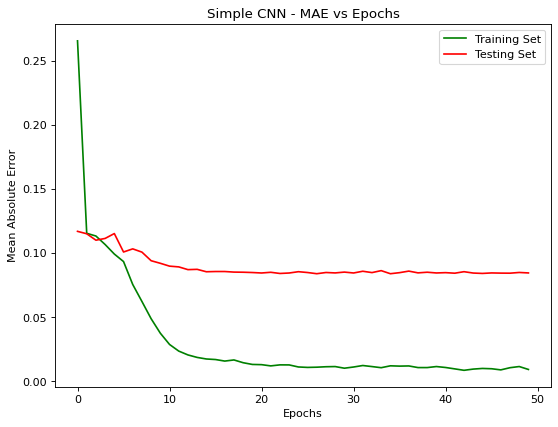

In [ ]:
### Plotting Evaluation Function- Mean Absolute Error
plot_scores(train,"Simple CNN")

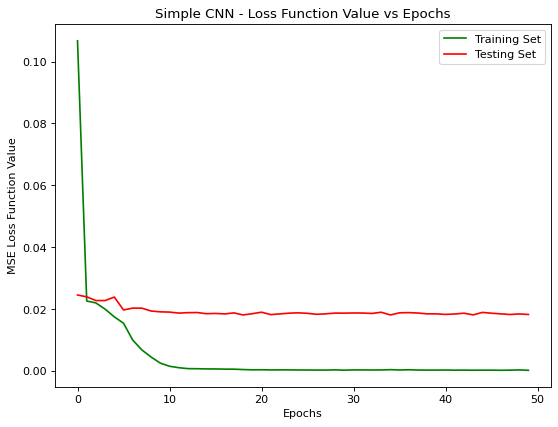

In [ ]:
### Plotting Loss Function
plot_loss(train,"Simple CNN")

In [ ]:
### Predicting output boundary values
y_cnn = model.predict(X_test)

3/3 [==============================] - 0s 71ms/step


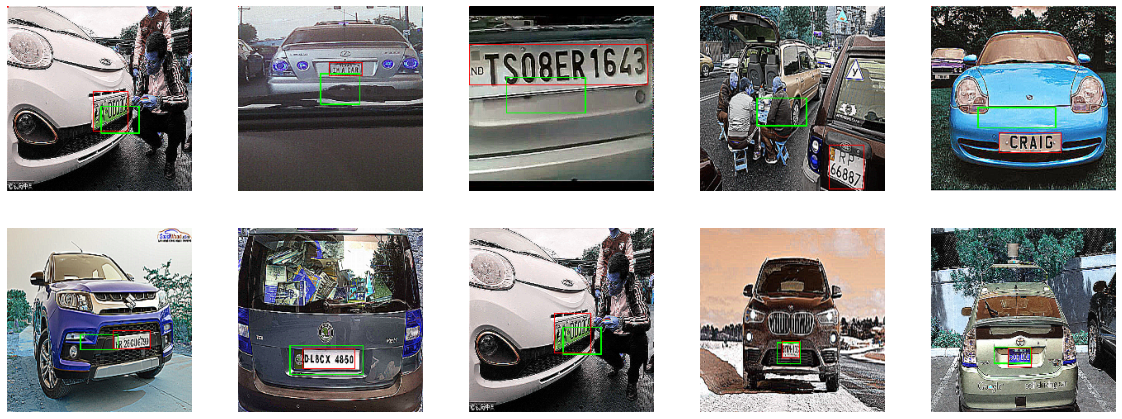

In [ ]:
### Plotting the boundaries based on prediction

boundaries(10,y_cnn,y_test,X_test,"/output")